In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Text-Summarization.csv')

In [3]:
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
first_column = df.iloc[:, 0].copy()

In [4]:
df.set_index(df.columns[0], inplace=True)

In [5]:
print(df)

0        0.714286  0.25   0.0  0.2  0.666667  1.0
BART                                             
T5       0.428571   0.5  0.50  0.6  0.333333  0.5
GPT-2    0.000000   1.0  1.00  1.0  0.000000  0.0
Pegasus  1.000000   0.6  0.50  0.8  0.333333  0.5
BERT     0.285714   0.0  0.25  0.0  1.000000  1.0


In [6]:
normalized_df = df.copy()
for column in df.columns[1:]:
    normalized_df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [7]:
weights = np.array([0.3, 0.2, 0.15, 0.1, 0.15, 0.1])

In [8]:
ideal_solution = normalized_df.max()
negative_ideal_solution = normalized_df.min()

In [9]:
distance_to_ideal = np.sqrt(((normalized_df - ideal_solution) ** 2).sum(axis=1))
distance_to_negative_ideal = np.sqrt(((normalized_df - negative_ideal_solution) ** 2).sum(axis=1))

In [10]:
closeness_coefficient = distance_to_negative_ideal / (distance_to_ideal + distance_to_negative_ideal)
df['Closeness Coefficient'] = closeness_coefficient

In [11]:
df['Rank'] = df['Closeness Coefficient'].rank(ascending=False)
df['Model'] = first_column
print(df[['Model', 'Rank', 'Closeness Coefficient']])

0       Model  Rank  Closeness Coefficient
BART                                      
T5        NaN   3.0               0.451026
GPT-2     NaN   2.0               0.500000
Pegasus   NaN   1.0               0.576065
BERT      NaN   4.0               0.435054


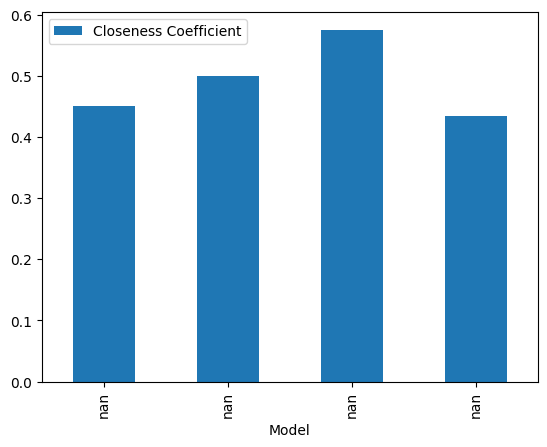

In [12]:
df.plot(x='Model', y='Closeness Coefficient', kind='bar')
plt.show()